# Set Directory Inside Forked Github Repository

In [1]:
import os
os.chdir('Tacotron2_PyTorch/')

# Imports

In [2]:
from Tacotron2_PyTorch.inference import *
import IPython
import numpy as np
import PIL

# Methods

In [10]:
def generateMel(text: str):
    ckpt_pth = '../checkpoint/ckpt_200000'
    model = load_model(ckpt_pth)
    output = infer(text, model)
    return output

def preview(output):
    mel_outputs, mel_outputs_postnet, _ = output
    plt.figure(figsize=(20, 8))
    plt.imshow(to_arr(mel_outputs_postnet[0]))
    plt.title('Mel spectrogram')
    plt.show()

def previewAll(output):
    mel_outputs, mel_outputs_postnet, attention = output
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(to_arr(mel_outputs[0]))
    plt.title('Mel spectrogram')
    plt.subplot(1, 3, 2)
    plt.imshow(to_arr(mel_outputs_postnet[0]))
    plt.title('Mel spectrogram postnet')
    plt.subplot(1, 3, 3)
    plt.imshow(to_arr(attention[0]))
    plt.title('Attention')
    plt.show()

def saveImg(output, path):
    mel_outputs, mel_outputs_postnet, _ = output
    array = to_arr(mel_outputs_postnet[0])
    # normalize
    print(array)
    array = (array - array.min()) / (array.max() - array.min())
    plt.imsave(path, array, cmap='viridis')
    plt.close()

# Inference

Terminated by gate.
[[-6.344329  -6.587929  -6.931076  ... -7.2067757 -7.2375593 -7.154601 ]
 [-5.615104  -5.886282  -5.968452  ... -6.3000207 -6.295253  -6.238442 ]
 [-5.3452005 -5.264103  -5.3852944 ... -5.553675  -5.559692  -5.5089436]
 ...
 [-6.726545  -6.2610803 -6.0280323 ... -8.040608  -8.032712  -8.030329 ]
 [-6.664984  -6.324685  -6.070667  ... -8.213364  -8.177497  -8.150106 ]
 [-6.945777  -6.4846706 -6.1926913 ... -8.293386  -8.2754345 -8.230215 ]]


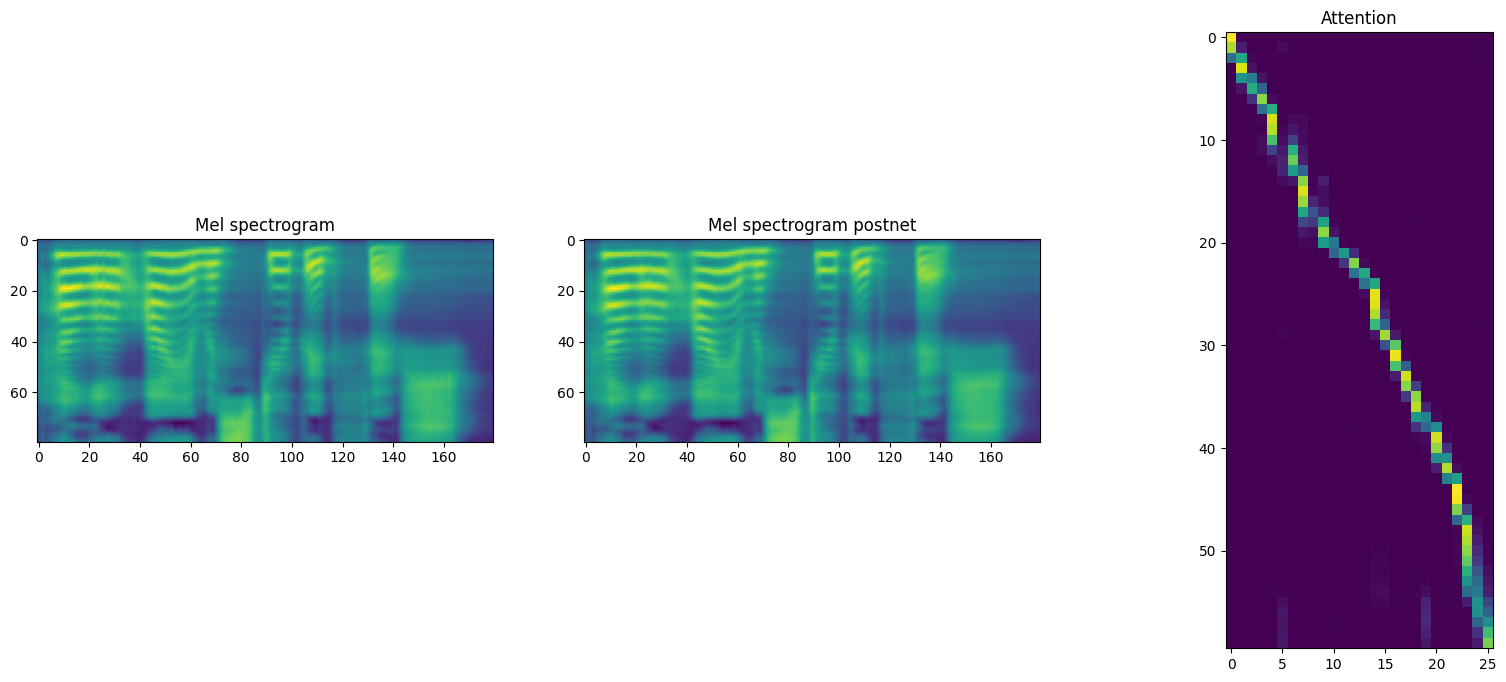

In [11]:
path = "../spectrograms"
text = "Hello, I am a stupid fish."

output = generateMel(text)
torch.save(output[1][0], f"{path}/mel.pt")
saveImg(output, f"{path}/mel.png")
# preview(output)
previewAll(output)

In [5]:
print(len(text))
print(to_arr(output[2][0]).shape)

26
(61, 26)


In [6]:
print(output[1][0].shape)

torch.Size([80, 183])
